<b>Spectral Clustering </b>

In [1]:
from sklearn.datasets import make_circles

from sklearn.neighbors import kneighbors_graph 

from sklearn.cluster import KMeans

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()


The data is generated using the **make_circles** dataset-generator of sklearn.
A total of 500 datapoints is generated.

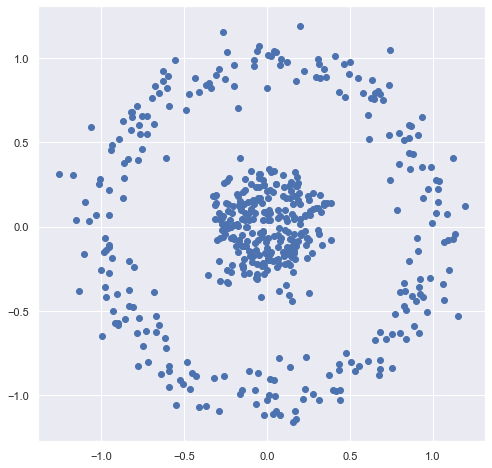

In [2]:
# create the data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2,random_state=0)
fig,ax = plt.subplots(1,1,figsize=(8,8))
plt.scatter(X[:,0],X[:,1]);

In a first step, we could proceed and use KMeans-clustering and see where we get:

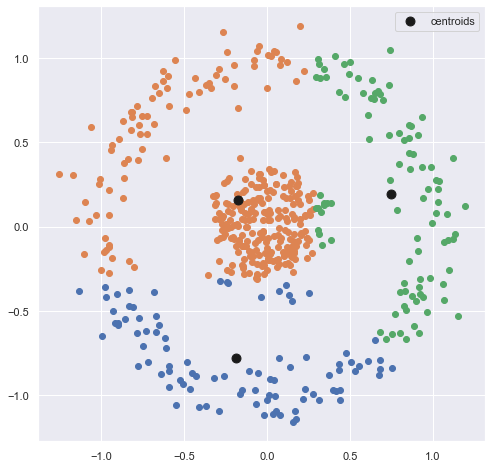

In [3]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_label = kmeans.predict(X)

fix , ax = plt.subplots(1,1,figsize=(8,8))
for i in np.unique(y_label):
    idx = y_label==i
    ax.scatter(X[idx,0],X[idx,1])

#plotting the centroids
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='k',s=80.0,label='centroids')
ax.legend();

The Adjacency matrix is constructed using `kneighbors_graph`

In [4]:
A = kneighbors_graph(X, n_neighbors=5).toarray()
pd.DataFrame(A).head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating a simple Laplacian $L$

In [5]:
D = np.diag(A.sum(axis=1))
L = D-A

Determine the eigenvalues and eigenvectors

In [6]:
vals, vecs = np.linalg.eig(L)
vals = np.real(vals)
vecs = np.real(vecs)

In [7]:
vecs_sorted = vecs[:,np.argsort((vals))]
vals_sorted = vals[np.argsort((vals))]

9.46503114291132e-16

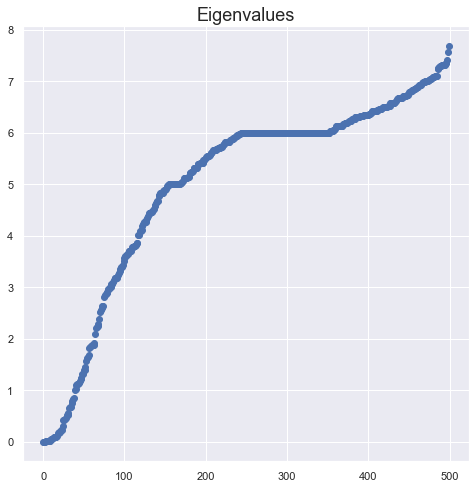

In [10]:
fig , ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(np.arange(0,len(vals_sorted)),abs(vals_sorted))
ax.set_title('Eigenvalues',fontsize=18);
vals_sorted[1]

In [11]:
vecs_sorted

array([[ 8.79099373e-03,  6.32120110e-02,  6.54675797e-02, ...,
        -9.04578726e-06,  3.63896482e-16, -1.26065853e-15],
       [-6.26316089e-02,  2.05953118e-03,  1.53724324e-13, ...,
        -2.08992470e-16, -8.28902573e-03, -2.87027852e-02],
       [-6.26316089e-02,  2.05953118e-03,  1.53536773e-13, ...,
        -1.22234189e-16,  2.04942300e-04,  2.27649410e-03],
       ...,
       [ 8.79099373e-03,  6.32120110e-02,  8.10094860e-02, ...,
         3.22246988e-04, -3.03480647e-16,  9.87481558e-18],
       [ 8.79099373e-03,  6.32120110e-02,  7.71153281e-16, ...,
         6.25312614e-17,  2.37831532e-16,  2.13579753e-16],
       [ 8.79099373e-03,  6.32120110e-02,  8.02001960e-02, ...,
         9.74324094e-02,  1.30592182e-15,  5.80203725e-16]])

Find the Fiedler Vector :<br>
This is the eigenvector which corresponds to the Fiedler Value (= the second eigenvalue)

Create an array with for every point in the cloud of 500 points the corresponding loading in the `Fiedler Vector`.
This is stored in an array **U**

In [21]:
U = np.array((vecs_sorted[:,3])).reshape(-1,1)
U

array([[-7.14101257e-03],
       [ 7.90331817e-15],
       [ 9.11555893e-15],
       [ 8.34134433e-15],
       [ 8.89978514e-15],
       [ 1.34083781e-01],
       [ 1.58777097e-14],
       [ 8.25446999e-15],
       [-7.57291542e-03],
       [-7.36632709e-03],
       [ 9.13901830e-02],
       [ 6.37343825e-15],
       [ 1.60574393e-14],
       [ 9.33939405e-15],
       [-5.95802184e-03],
       [ 7.72423725e-15],
       [ 8.14411246e-15],
       [ 1.55784645e-14],
       [-7.13369902e-03],
       [ 1.10798557e-01],
       [-2.53498973e-04],
       [ 1.49313226e-14],
       [ 1.35306738e-02],
       [-8.85557138e-03],
       [ 1.01281546e-01],
       [ 1.12640074e-14],
       [ 1.40141392e-01],
       [ 1.56963582e-14],
       [-9.02722998e-03],
       [ 1.27693777e-02],
       [ 1.08854744e-14],
       [-8.15643635e-03],
       [-8.38557735e-03],
       [-3.71904740e-03],
       [ 1.23361209e-14],
       [ 8.18668378e-15],
       [ 1.56567623e-14],
       [ 1.11052507e-14],
       [ 1.5

These elements are split in two different clusters using `KMeans ++`

In [22]:
km = KMeans(init='k-means++', n_clusters=4,random_state=0)
km.fit(U);

With this knowledge we can assign each of the points to these clusters

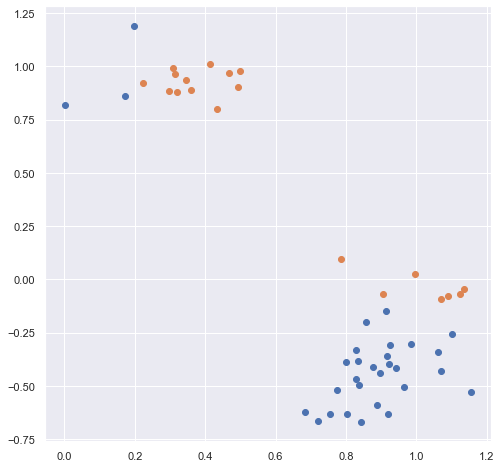

In [23]:
fig,ax = plt.subplots(1,1,figsize=(8,8))

plt.scatter(X[km.labels_==0,0],X[km.labels_==0,1])
plt.scatter(X[km.labels_==1,0],X[km.labels_==1,1]);